<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

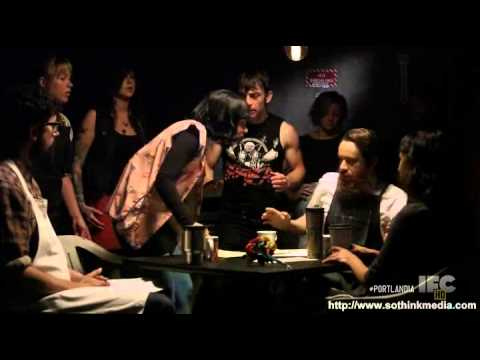

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\kelsi\\Lambda\\Unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 
shops.shape

(7616, 3)

In [5]:
# Imports
import pandas as pd
from collections import Counter

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#import scattertext as st

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [7]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [66]:
# remove the date from the reviews
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r".[0-9]+/[0-9]+/[0-9]+", '', x))

In [67]:
# tokenize the text to get a count of the tokens
tokens = [token.text for token in tokenizer(shops['full_review_text'][0])]
print(len(tokens))
print(tokens)

99
[' ', '1', 'check-in', 'Love', 'love', 'loved', 'the', 'atmosphere!', 'Every', 'corner', 'of', 'the', 'coffee', 'shop', 'had', 'its', 'own', 'style,', 'and', 'there', 'were', 'swings!!!', 'I', 'ordered', 'the', 'matcha', 'latte,', 'and', 'it', 'was', 'muy', 'fantastico!', 'Ordering', 'and', 'getting', 'my', 'drink', 'were', 'pretty', 'streamlined.', 'I', 'ordered', 'on', 'an', 'iPad,', 'which', 'included', 'all', 'beverage', 'selections', 'that', 'ranged', 'from', 'coffee', 'to', 'wine,', 'desired', 'level', 'of', 'sweetness,', 'and', 'a', 'checkout', 'system.', 'I', 'got', 'my', 'latte', 'within', 'minutes!', ' ', 'I', 'was', 'hoping', 'for', 'a', 'typical', 'heart', 'or', 'feather', 'on', 'my', 'latte,', 'but', 'found', 'myself', 'listing', 'out', 'all', 'the', 'possibilities', 'of', 'what', 'the', 'art', 'may', 'be.', 'Any', 'ideas?']


### Add custom stopwords

In [101]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place', "it's", "i'm", "i've"])

### Tokenize the text

In [102]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False) & (token.is_digit == False) & (token.text != re.match(r".[0-9]+/[0-9]+/[0-9]+", token.text)):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [check-in, located, northcross, mall, shopping...
Name: spaCy_tokens, dtype: object

In [103]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,spaCy_tokens,token_length,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[check-in, love, love, loved, atmosphere!, cor...",45,good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,"[listed, date, night:, austin,, ambiance, aust...",26,good
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[check-in, listed, brunch, spots, loved, eclec...",107,good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho...",38,bad
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,"[check-in, located, northcross, mall, shopping...",61,good


In [104]:
# get the length of the tokenized text
shops['token_length'] = shops['spaCy_tokens'].apply(lambda x: len(x))

In [105]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,spaCy_tokens,token_length,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[check-in, love, love, loved, atmosphere!, cor...",45,good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,"[listed, date, night:, austin,, ambiance, aust...",26,good
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[check-in, listed, brunch, spots, loved, eclec...",107,good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho...",38,bad
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,"[check-in, located, northcross, mall, shopping...",61,good


In [ ]:
# convert the star_rating to an int
shops['star_rating'] = shops['star_rating'].apply(lambda x: x[1])
shops['star_rating'] = shops['star_rating'].astype(int)

In [106]:
# categorize the ratings
shops['rating'] = shops['star_rating'].apply(lambda x: "good" if x > 3 else "bad")

In [107]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,spaCy_tokens,token_length,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[check-in, love, love, loved, atmosphere!, cor...",45,good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,"[listed, date, night:, austin,, ambiance, aust...",26,good
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[check-in, listed, brunch, spots, loved, eclec...",107,good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho...",38,bad
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,"[check-in, located, northcross, mall, shopping...",61,good


In [108]:
# get the average length of the tokens grouped by the rating
length_by_rating = shops.groupby("rating")['token_length'].value_counts()
length_by_rating.groupby('rating').mean()

rating
bad      8.245810
good    28.826291
Name: token_length, dtype: float64

In [109]:
# get the average length of the tokens grouped by the star_rating
length_by_rating = shops.groupby("star_rating")['token_length'].value_counts()
length_by_rating.groupby('star_rating').mean()

star_rating
1     2.527273
2     3.709677
3     5.125000
4    13.038674
5    20.322581
Name: token_length, dtype: float64

### Get a count of the tokens then group it by rating

In [79]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts of words in the document set.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [115]:
wc = count(shops['spaCy_tokens'])
print(wc.shape)
wc.head(10)

(38645, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
140,great,2438,3250,1.0,0.008859,0.008859,0.320116
163,like,2034,2902,2.0,0.007911,0.016770,0.267069
188,good,2084,2779,3.0,0.007575,0.024346,0.273634
25,check-in,1957,1961,4.0,0.005346,0.029691,0.256959
10,love,1434,1806,5.0,0.004923,0.034614,0.188288
779,little,1230,1479,6.0,0.004032,0.038646,0.161502
279,don't,1133,1395,7.0,0.003803,0.042449,0.148766
187,nice,1188,1368,8.0,0.003729,0.046178,0.155987
394,food,1092,1363,9.0,0.003715,0.049893,0.143382
600,time,1099,1345,10.0,0.003666,0.053560,0.144301


In [111]:
condition_a = (shops['rating'] == 'good')
condition_b = (shops['rating'] == 'bad')
good_shops = shops[condition_a]
bad_shops = shops[condition_b]

In [117]:
wc_good = count(good_shops['spaCy_tokens'])
print(wc_good.shape)
wc_good.head(10)

(32657, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
140,great,2174,2902,1.0,0.010172,0.010172,0.354072
311,good,1643,2180,2.0,0.007641,0.017813,0.267590
211,like,1486,2068,3.0,0.007248,0.025061,0.242020
10,love,1263,1604,4.0,0.005622,0.030683,0.205700
25,check-in,1598,1602,5.0,0.005615,0.036298,0.260261
594,little,1027,1230,6.0,0.004311,0.040609,0.167264
242,nice,962,1101,7.0,0.003859,0.044468,0.156678
447,best,951,1093,8.0,0.003831,0.048299,0.154886
185,friendly,986,1014,9.0,0.003554,0.051853,0.160586
59,austin,875,1013,10.0,0.003551,0.055404,0.142508


In [118]:
wc_bad = count(bad_shops['spaCy_tokens'])
print(wc_bad.shape)
wc_bad.head(10)

(15491, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,like,548,834,1.0,0.010228,0.010228,0.371274
35,good,441,599,2.0,0.007346,0.017574,0.298780
185,don't,340,430,3.0,0.005274,0.022848,0.230352
58,food,266,369,4.0,0.004525,0.027373,0.180217
60,check-in,359,359,5.0,0.004403,0.031776,0.243225
220,time,264,351,6.0,0.004305,0.036081,0.178862
108,pretty,278,349,7.0,0.004280,0.040361,0.188347
168,great,264,348,8.0,0.004268,0.044629,0.178862
512,people,247,327,9.0,0.004010,0.048639,0.167344
11,service,261,314,10.0,0.003851,0.052490,0.176829


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [122]:
# Get the frequency for each word based on good
wc_good['good_freq'] = (wc_good['count']/wc_good['count'].sum())
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq
140,great,2174,2902,1.0,0.010172,0.010172,0.354072,0.010172
311,good,1643,2180,2.0,0.007641,0.017813,0.267590,0.007641
211,like,1486,2068,3.0,0.007248,0.025061,0.242020,0.007248
10,love,1263,1604,4.0,0.005622,0.030683,0.205700,0.005622
25,check-in,1598,1602,5.0,0.005615,0.036298,0.260261,0.005615


In [123]:
# Get the frequency for each word based on bad
wc_bad['bad_freq'] = (wc_bad['count']/wc_bad['count'].sum())
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_freq
7,like,548,834,1.0,0.010228,0.010228,0.371274,0.010228
35,good,441,599,2.0,0.007346,0.017574,0.298780,0.007346
185,don't,340,430,3.0,0.005274,0.022848,0.230352,0.005274
58,food,266,369,4.0,0.004525,0.027373,0.180217,0.004525
60,check-in,359,359,5.0,0.004403,0.031776,0.243225,0.004403


In [120]:
print(wc.shape)
wc.head()

(38645, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
140,great,2438,3250,1.0,0.008859,0.008859,0.320116
163,like,2034,2902,2.0,0.007911,0.016770,0.267069
188,good,2084,2779,3.0,0.007575,0.024346,0.273634
25,check-in,1957,1961,4.0,0.005346,0.029691,0.256959
10,love,1434,1806,5.0,0.004923,0.034614,0.188288


In [131]:
#Merge the good and bad freq to the main wc dataframe
wc = pd.merge(wc, wc_good[['word','good_freq']], how='left', on='word')
wc = pd.merge(wc, wc_bad[['word','bad_freq']], how='left', on='word')

In [134]:
# replace NaN values with zero
wc['good_freq'] = wc['good_freq'].fillna(0)
wc['bad_freq'] = wc['bad_freq'].fillna(0)
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq,bad_freq
38640,actuality.,1,1,38641.0,0.000003,0.999989,0.000131,0.000004,0.0
38641,crass.,1,1,38642.0,0.000003,0.999992,0.000131,0.000004,0.0
38642,restrictions.,1,1,38643.0,0.000003,0.999995,0.000131,0.000004,0.0
38643,"specially,",1,1,38644.0,0.000003,0.999997,0.000131,0.000004,0.0
38644,"digestion,",1,1,38645.0,0.000003,1.000000,0.000131,0.000004,0.0


In [138]:
# get the difference in frequencies
wc['freq_diff'] = abs(wc['good_freq'] - wc['bad_freq'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq,bad_freq,freq_diff
0,great,2438,3250,1.0,0.008859,0.008859,0.320116,0.010172,0.004268,0.005904
1,like,2034,2902,2.0,0.007911,0.016770,0.267069,0.007248,0.010228,0.002980
2,good,2084,2779,3.0,0.007575,0.024346,0.273634,0.007641,0.007346,0.000295
3,check-in,1957,1961,4.0,0.005346,0.029691,0.256959,0.005615,0.004403,0.001212
4,love,1434,1806,5.0,0.004923,0.034614,0.188288,0.005622,0.002477,0.003145


In [141]:
top_ten_diff = wc[['word', 'freq_diff', 'good_freq', 'bad_freq']].nlargest(10, 'freq_diff')
top_ten_diff

,word,freq_diff,good_freq,bad_freq
0,great,0.005904,0.010172,0.004268
4,love,0.003145,0.005622,0.002477
1,like,0.002980,0.007248,0.010228
15,best,0.002948,0.003831,0.000883
23,check-ins,0.002033,0.003260,0.001226
170,asked,0.001952,0.000428,0.002379
17,friendly,0.001948,0.003554,0.001607
46,delicious,0.001910,0.002327,0.000417
38,didn't,0.001892,0.001689,0.003581
6,don't,0.001891,0.003382,0.005274


In [165]:
top_ten_diff.set_index('word')

,freq_diff,good_freq,bad_freq
word,,,
great,0.005904,0.010172,0.004268
love,0.003145,0.005622,0.002477
like,0.002980,0.007248,0.010228
best,0.002948,0.003831,0.000883
check-ins,0.002033,0.003260,0.001226
asked,0.001952,0.000428,0.002379
friendly,0.001948,0.003554,0.001607
delicious,0.001910,0.002327,0.000417
didn't,0.001892,0.001689,0.003581


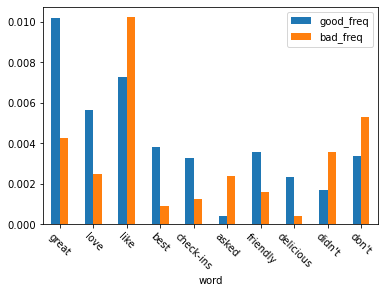

In [169]:
top_ten_diff[['good_freq', 'bad_freq']].plot.bar(rot=-45);

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

